# Group Project For ASTR 19

In [81]:
from astropy.io import ascii
import matplotlib.pyplot as plt

In [82]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


In [83]:
print(data.columns)
print(data.colnames)
print(data.meta)
print(len(data))

<TableColumns names=('HJD','Radial_Velocity','Radial_Velocity_Uncertainty')>
['HJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']
{'comments': [], 'keywords': {'STAR_ID': {'value': 'HD 75732'}, 'DATA_CATEGORY': {'value': 'Planet Radial Velocity Curve'}, 'NUMBER_OF_POINTS': {'value': '274'}, 'TIME_REFERENCE_FRAME': {'value': 'HJD'}, 'MINIMUM_DATE': {'value': '2449676.0632'}, 'DATE_UNITS': {'value': 'days'}, 'MAXIMUM_DATE': {'value': '2455603.80404'}, 'MINIMUM_VALUE': {'value': '-130.570007324'}, 'VALUE_UNITS': {'value': 'm/s'}, 'MAXIMUM_VALUE': {'value': '141.460006714'}, 'REFERENCE': {'value': 'Howard & Fulton, 2016'}, 'BIBCODE': {'value': '2016arXiv160603134H'}, 'TELESCOPE': {'value': '3.0m Shane'}, 'INSTRUMENT': {'value': 'l: Hamilton Spectrograph post-dewar 16 (after November 1994)'}, 'WAVELENGTH_CALIBRATION_TECHNIQUE': {'value': 'Iodine'}, 'OBSERVATORY_SITE': {'value': 'Lick Observatory, California'}, 'COLUMN_RADIAL_VELOCITY': {'value': 'Relative radial velocity'}, 'COLUMN_RAD

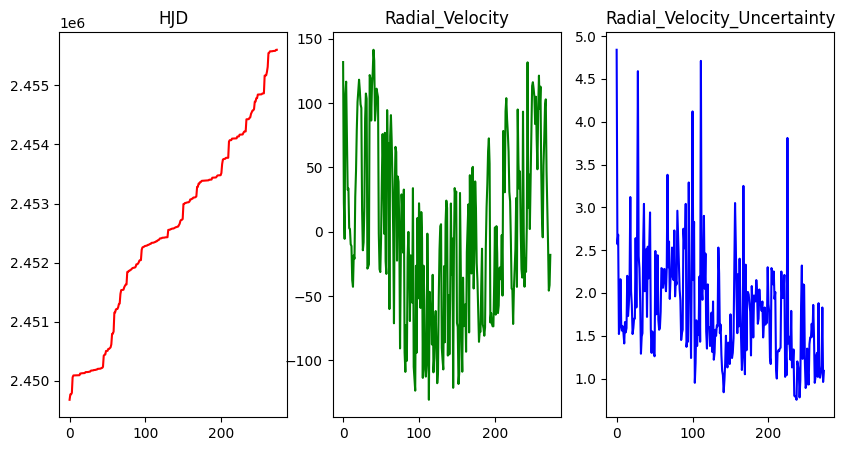

In [84]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))

# define x based on number of rows
x = range(len(data))

color = ["r", "g", "b"]

for i in range(len(data.columns)):
    ax[i].plot(x, data.columns[i], c=color[i])
    ax[i].set_title(f'{data.colnames[i]}')

fig.savefig("data.pdf")
plt.show()

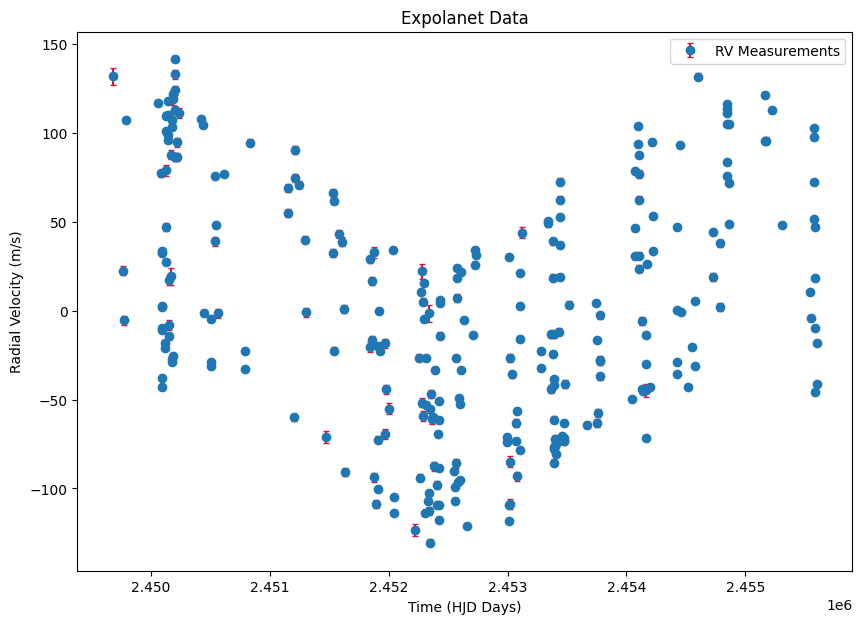

In [85]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

plt.figure(figsize=(10, 7))
plt.errorbar(x=hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel("Time (HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

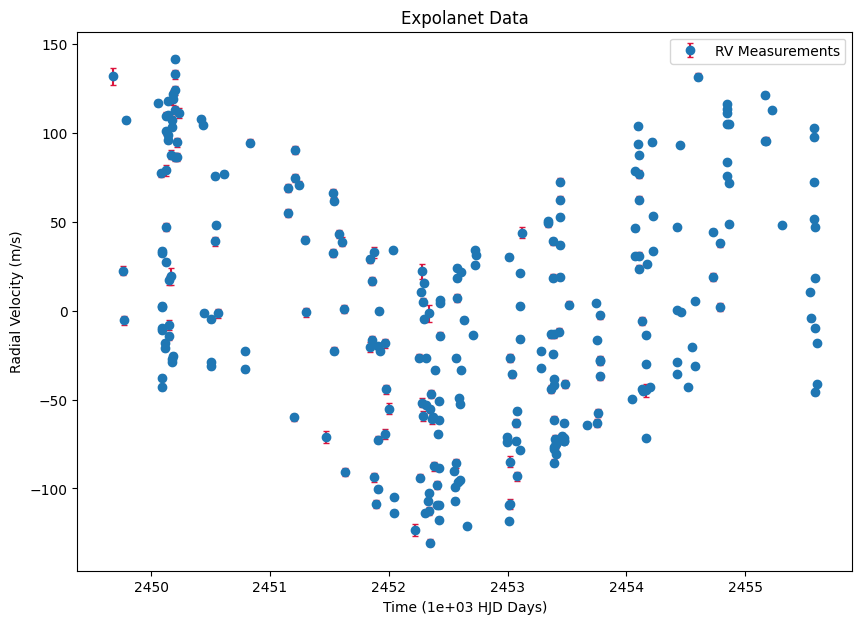

In [86]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

scalar = 1e3
scaled_hjd = hjd / scalar

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

In [87]:
import numpy as np
from scipy import optimize

Fitted params: [-47.91804209  91.26667119   4.8069813   -1.41826476]


<Figure size 600x600 with 0 Axes>

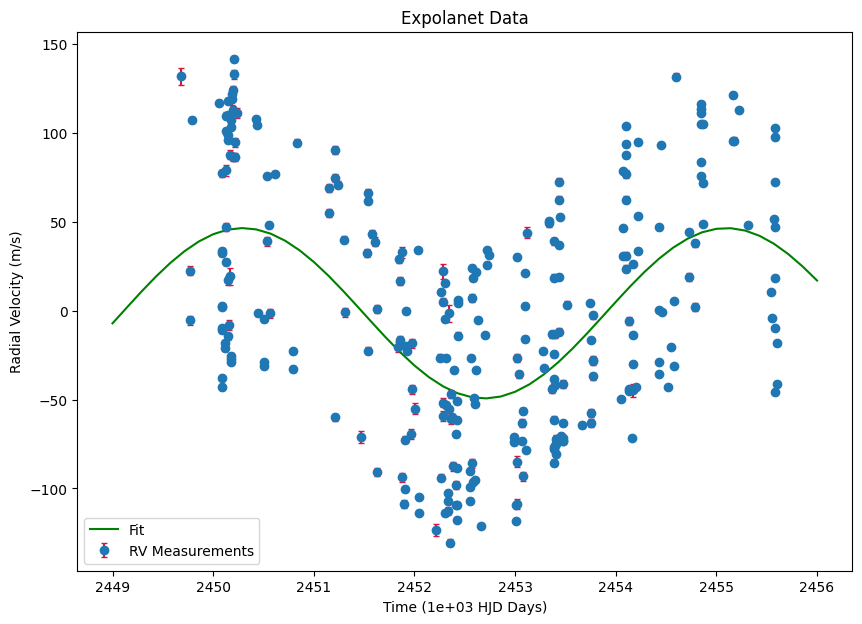

In [88]:
# define the model function we are trying to fit
# a: amplitude
# b: phase shift
# c: wavelength/period
# d: vertical shift
def f_curve(x, a, b, c, d):
    return a * np.sin(2.0*np.pi * (x - b) / c) + d

# do the fit
# scipy tried but it didn't work well T-T
# params, params_cov = optimize.curve_fit(f_curve, x, y, sigma = y_err, absolute_sigma=True)

initial_guess = [5, 1, 5, 0]
# lower_bound = [3,1,2,-2]
# upper_bound = [4,2,3,-1]

# we can help scipy find the best fit value by providing the initial guess ourselves
# this worked but the parameters are not quite those expected
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess)


# # in particularly difficult cases we can also provide boundaries to explore parameter ranges
# initial_guess = [3,1,2,-1]
# lower_bound = [3,1,2,-2]
# upper_bound = [4,2,3,-1]
# params, params_cov = optimize.curve_fit(f_curve, x, y, sigma = y_err, absolute_sigma=True,
#             p0 = initial_guess,
#             bounds = (lower_bound, upper_bound))


print(f"Fitted params: {params}")

# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...'

f = plt.figure(figsize=(6,6))

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()

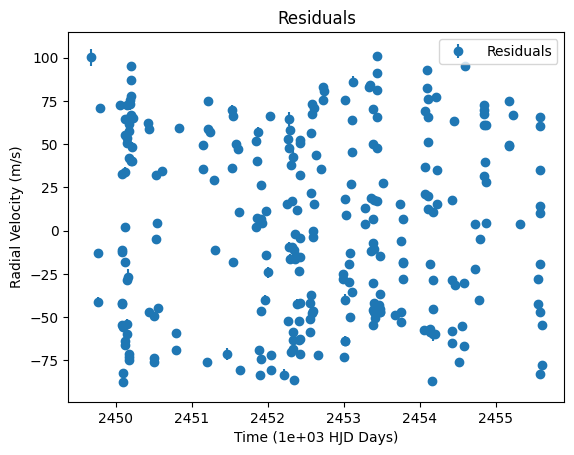

In [89]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals = radial_velocity - y_pred

# plot residuals
plt.errorbar(scaled_hjd, residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

In [90]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_rms = np.sqrt(np.mean(residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8499486718105136
Residuals stdev is 52.2120803969826213
Residuals RMS is   52.2120803969826213


In [91]:
def gaussian(x,mu,s):
    return 1./np.sqrt(2.0*np.pi*s**2) * np.exp(-0.5*((x-mu)/s)**2)

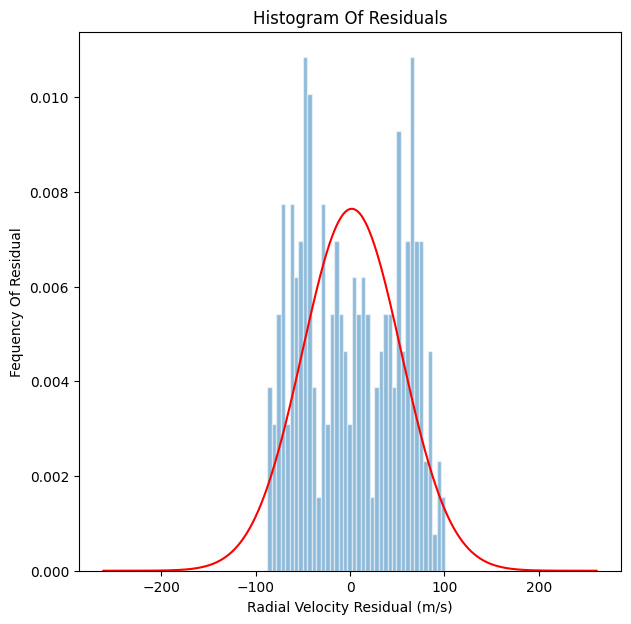

In [92]:
f,ax = plt.subplots(1,1,figsize=(7,7))

counts, bins_custom = np.histogram(residuals,bins=40)
ax.hist(residuals,bins=bins_custom,alpha=0.5,edgecolor="white",density=True)

# draw the gaussian function based on mean and stdev of residuals
x_g = np.linspace(-5*residuals_std,5*residuals_std,1000)
ax.plot(x_g,gaussian(x_g,residuals_mean,residuals_std),color="red")

ax.set_xlabel('Radial Velocity Residual (m/s)')
ax.set_ylabel('Fequency Of Residual')
ax.set_title('Histogram Of Residuals')

plt.show()

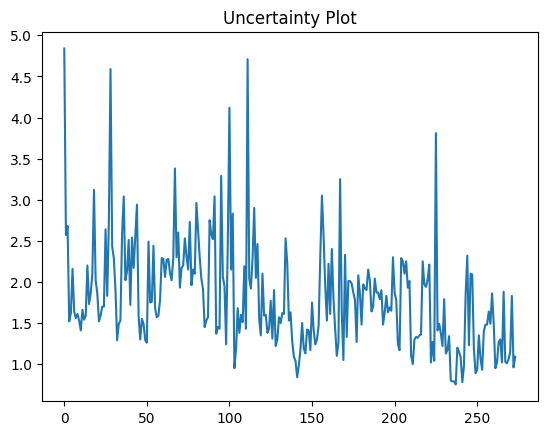

Mean Uncertainty: 1.8060667343065693
Stdev Uncertainty: 0.6427887768668138
Uncertainty RMS is   1.917043155600502


In [93]:
# calculate experimental error
plt.plot(uncertainty)
plt.title("Uncertainty Plot")
plt.show()

uncertainty_mean = np.mean(uncertainty)
uncertainty_std = np.std(uncertainty)
uncertainty_rms = np.sqrt(np.mean(uncertainty**2))

print(f"Mean Uncertainty: {uncertainty_mean}")
print(f"Stdev Uncertainty: {uncertainty_std}")
print(f"Uncertainty RMS is   {uncertainty_rms}")